In [10]:
import numpy as np
from subprocess import getoutput
import requests
import sys
import ssl
import pandas as pd
from OpenSSL import crypto
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
filename = '/home/szlupek/Desktop/entropy.txt'
data = open(filename).read().splitlines()


In [40]:
data = np.array(data).astype(np.int32)
x = np.arange(len(data))/2
print(data)

[3811 3811 3812 ... 3254 3260 3266]


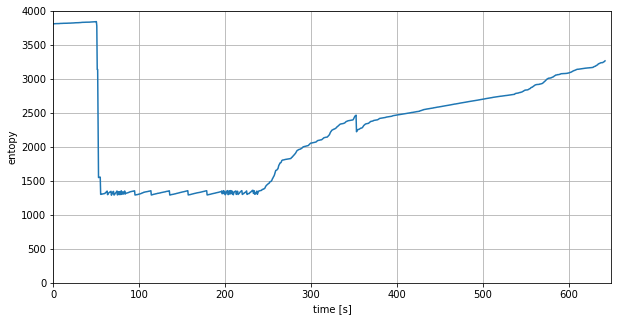

In [55]:
plt.figure(figsize=(10,5))
plt.plot(x,data)
plt.xlabel('time [s]')
plt.ylabel("entopy")
#plt.title('Wykres entropii w czasie przy generacji klucza GPG \n na sytemie Linux Mint 18')
plt.xlim(0,650)
plt.ylim(0,4000)
plt.grid()
plt.savefig('entriopia_NT.png')
plt.show()


# Scrapping data from webistes

In [8]:
pd_pages = pd.read_csv('top10milliondomains.csv')

In [9]:
pd_pages['Key'] = np.nan

key_page = {}

In [ ]:
j = 0
for i, p in pd_pages.iterrows():
    if p['Rank'] % 100 == 0:
        print(j)
    
    hostname = p['Domain'] 

    for port in range(65536):
        try:
            cert = ssl.get_server_certificate((hostname, port))

            x509 = crypto.load_certificate(crypto.FILETYPE_PEM, cert)
            key = crypto.dump_publickey(crypto.FILETYPE_PEM,x509.get_pubkey())
            key_decode = key.decode()

            j += 1
            print('succes')
            break

        except:
            key_decode = np.nan
    

    pd_pages['Key'][i] =  key_decode

    if key_decode in key_page:
        key_page[key_decode] = key_page[key_decode] + [hostname]
    else:
        key_page[key_decode] = [hostname]

print(len(key_page))